<a href="https://colab.research.google.com/github/VedereArtificiala/prelucrareaimaginilor-proiect-fratiibrothers/blob/main/src/ColabDavid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# https://github.com/RahulSriv/Iris-Segmentation/tree/master

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/PI-P/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/PI-P


In [23]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [24]:
image_path = "Iris1.jpg"

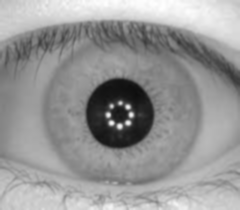

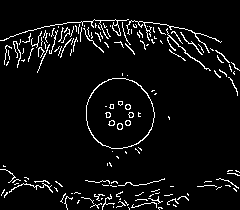

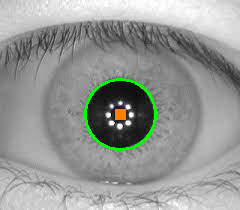

In [25]:
# inner_circle.py

# Read the image
image_read = cv2.imread(image_path)
output = image_read.copy()

# Convert the image to grayscale
image_test = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_test = cv2.GaussianBlur(image_test, (7, 7), 1)

# Display the preprocessed image
cv2_imshow(image_test)

# Apply Canny edge detection
image_test = cv2.Canny(image_test, 80, 100, apertureSize=3)

# Display the Canny edges
cv2_imshow(image_test)

# Hough Circle detection
circles = cv2.HoughCircles(
    image_test,
    cv2.HOUGH_GRADIENT,
    1,
    50,
    param1=50,
    param2=50,
    minRadius=0,
    maxRadius=0
)

# Draw circles on the output image
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(output, (x, y), r, (0, 255, 0), 2)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

# Display the result with detected circles
cv2_imshow(output)

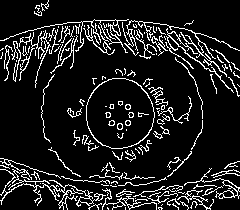

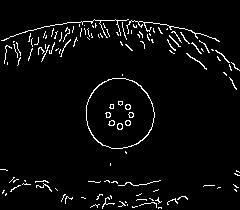

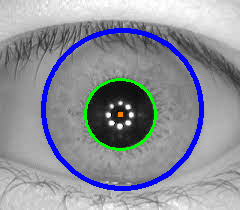

In [26]:
# iris_inner-puter.py

image_read = cv2.imread(image_path)
output = image_read.copy()
image_test = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_test = cv2.GaussianBlur(image_test, (7, 7), 1)
image_test = cv2.Canny(image_test, 20, 70, apertureSize=3)
cv2_imshow(image_test)

hough_circle = cv2.HoughCircles(image_test, cv2.HOUGH_GRADIENT, 1.3, 800)
if hough_circle is not None:
    hough_circle = np.round(hough_circle[0, :]).astype("int")
    for (x, y, radius) in hough_circle:
        cv2.circle(output, (x, y), radius, (255, 0, 0), 4)

image_test = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_test = cv2.GaussianBlur(image_test, (7, 7), 1)
image_test = cv2.Canny(image_test, 100, 120, apertureSize=3)
cv2_imshow(image_test)

circles = cv2.HoughCircles(image_test,cv2.HOUGH_GRADIENT,1,800,
                            param1=50,param2=20,minRadius=0,maxRadius=60)
circles = np.round(circles[0, :]).astype("int")

for (x, y, r) in circles:
		cv2.circle(output, (x, y), r, (0, 255, 0), 2)
		cv2.rectangle(output, (x - 2, y - 2), (x + 2, y + 2), (0, 128, 255), -1)

cv2_imshow(output)

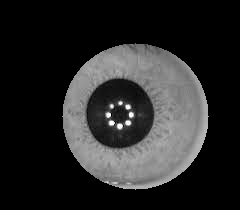

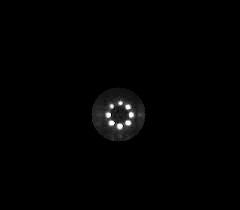

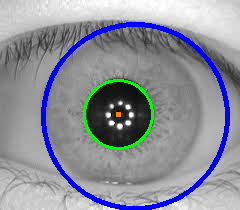

In [27]:
import cv2
import numpy as np
# Read the image
image_read = cv2.imread(image_path)
output = image_read.copy()

# Convert the image to grayscale and apply GaussianBlur
image_gray = cv2.cvtColor(image_read, cv2.COLOR_BGR2GRAY)
image_gray = cv2.GaussianBlur(image_gray, (7, 7), 1)

# Detect the iris using HoughCircles
circles_iris = cv2.HoughCircles(image_gray, cv2.HOUGH_GRADIENT, 1.3, 800, param1=50, param2=30, minRadius=40, maxRadius=120)

if circles_iris is not None:
    circles_iris = np.round(circles_iris[0, :]).astype("int")
    for (x, y, radius) in circles_iris:
        # Draw the circle on the output image
        cv2.circle(output, (x, y), radius, (255, 0, 0), 4)

        # Create a mask for the iris
        mask_iris = np.zeros_like(image_gray)
        cv2.circle(mask_iris, (x, y), int(radius * 0.8), 255, thickness=-1)

        # Extract the iris region using the mask
        segmented_iris = cv2.bitwise_and(image_read, image_read, mask=mask_iris)

        # Display the segmented iris
        cv2_imshow(segmented_iris)

# Convert the image to grayscale and apply GaussianBlur
image_gray = cv2.GaussianBlur(image_gray, (7, 7), 1)

# Detect the pupil using HoughCircles
circles_pupil = cv2.HoughCircles(image_gray, cv2.HOUGH_GRADIENT, 1, 800,
                                 param1=50, param2=20, minRadius=0, maxRadius=60)

if circles_pupil is not None:
    circles_pupil = np.round(circles_pupil[0, :]).astype("int")
    for (x, y, radius) in circles_pupil:
        # Draw the circle on the output image
        cv2.circle(output, (x, y), radius, (0, 255, 0), 2)
        cv2.rectangle(output, (x - 2, y - 2), (x + 2, y + 2), (0, 128, 255), -1)

        # Create a mask for the pupil
        mask_pupil = np.zeros_like(image_gray)
        cv2.circle(mask_pupil, (x, y), int(radius * 0.8), 255, thickness=-1)

        # Extract the pupil region using the mask
        segmented_pupil = cv2.bitwise_and(image_read, image_read, mask=mask_pupil)

        # Display the segmented pupil
        cv2_imshow(segmented_pupil)

# Display the final output image with circles and rectangles
cv2_imshow(output)